<a href="https://colab.research.google.com/github/sherjahong1r/Machine-Learning-Lessons/blob/main/05_ml_amaliyot_Toshkent_uy_bashorati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

# **START**

# **1-QADAM**

## Loyihadan maqsad va kutilayotgan natijalarni aniqlaymiz,

## Loyihada bizga qanday ma'lumotlar taqdim etilganini ko'ramiz,

## Bizga berilgan ma'lumotlar necha foiz aniqlikda ekanligini aniqlaymiz

## 1.1 Jarayonlarni tushunish,

## 1.2 Analitik yondoshuvni aniqlash
## Bu bosqichda biz bir nechta narsalarni aniqlashtirib olamiz:

Model: Supervised, Unsupervised, Reinforcement?
Algoritm: klassifikasiya, regressiya, yoki boshqa turda
Usul: Online yoki offline
Yuqoridagi savollarga javob beramiz:

Supervised learning - sababi bizda ma'lumotlarda label (yorliq) mavjud. Bu hududdagi price yani narx. Biz ham aynan shu narxni bashorat qilmoqchimiz.
Regressiya - "Bashorat" (prognoz) dedikmi demak bu regressia algoritmlari yordamida hal qilinadi

Offline - sababi ma'lumotlar bizga avvaldan bir marta berilgan. Doimiy ma'lumotlar oqimi yo'q.
Model aniqligini qanday baholaymiz?

Aniqlikni baholashning turli usullari bor, regressiya algoritmlar uchun odatda o'rtacha kvadrat xatolik (Root Mean Square Error - RMSE) ko'p ishlatiladi:

Yoki boshqa usullardan foydalanamiz.

# **2-QADAM**

# **Ma'lumotlarni o'rganamiz**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # scite-learn kutubxonasi

In [ ]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
df.shape

(7565, 7)

##Ustunlar ta'rifi

location - sotilayotgan uy manzili

district - uy joylashgan tuman

rooms - xonalar soni

size - uy maydoni (kv.m)

level - uy joylashgan qavat

max_levels - ja'mi qavatlar soni

price - uy narxi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


# **NEW SECTION**

## Grafik orqali ko'ramiz

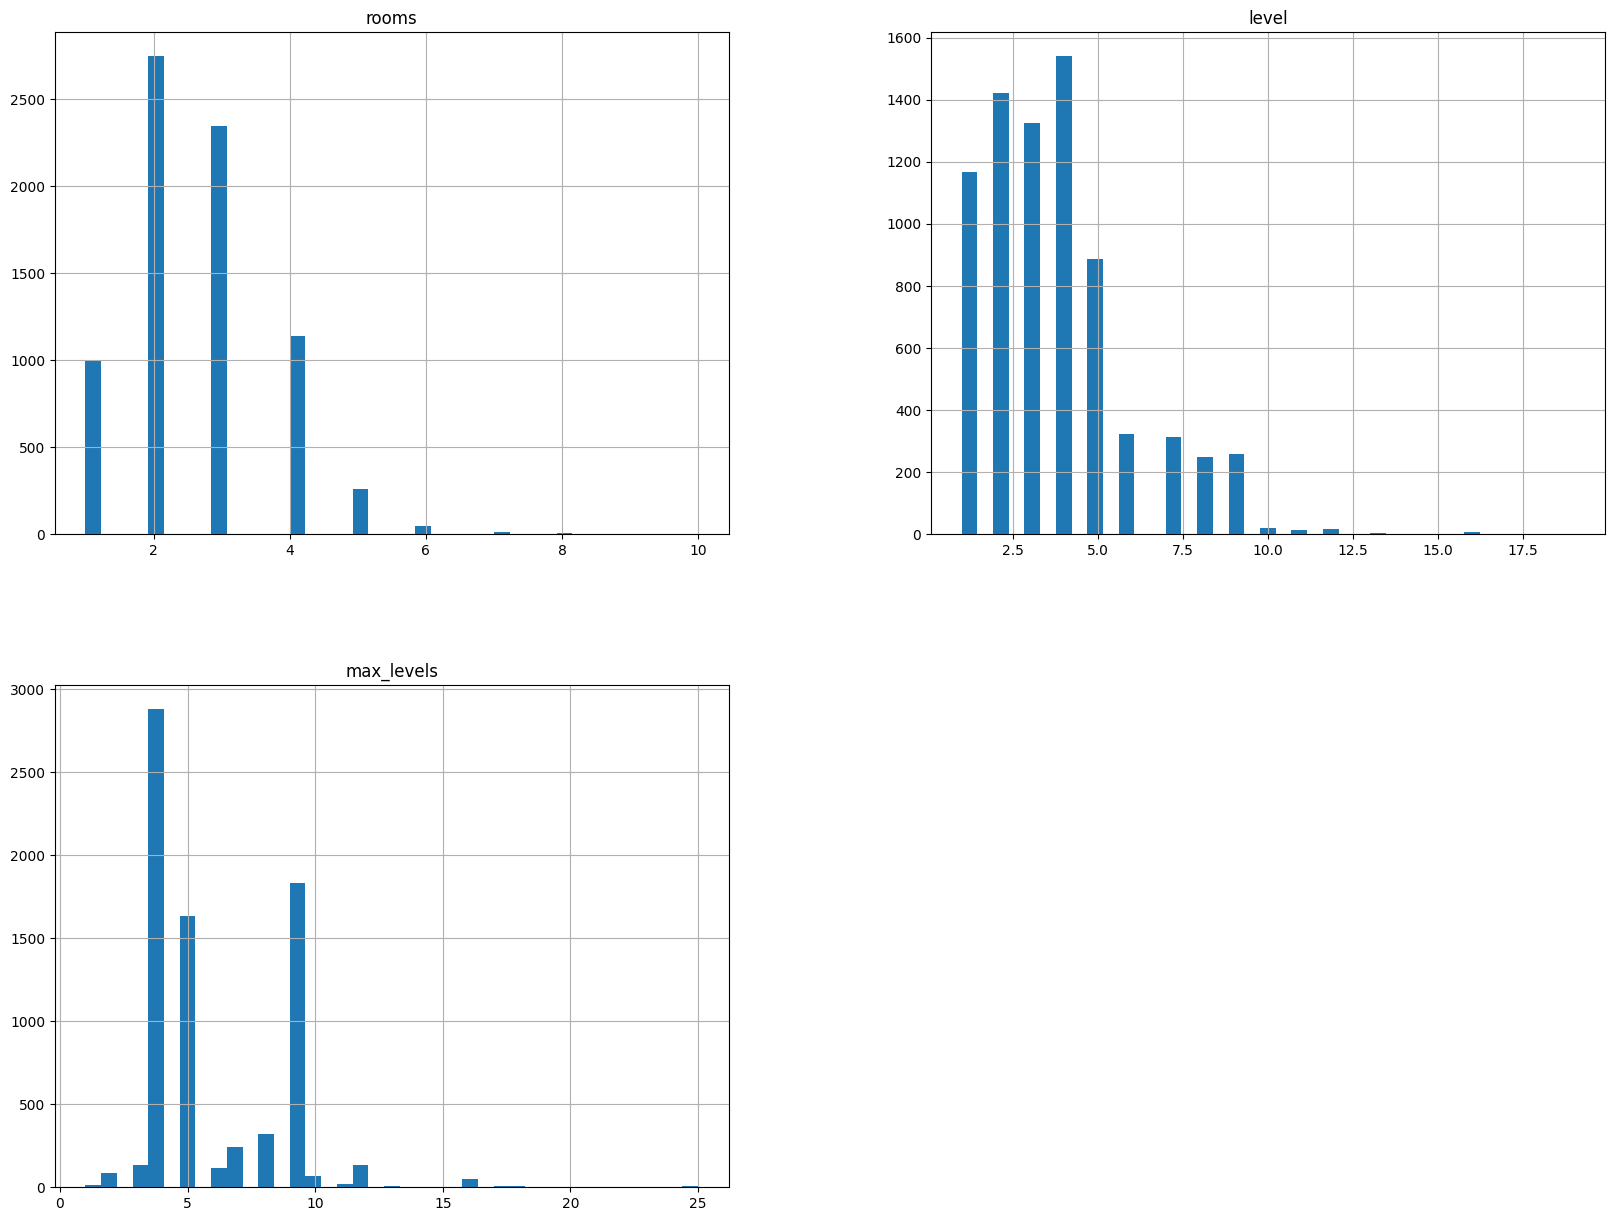

In [ ]:
%matplotlib inline
df.hist(bins=39, figsize=(20,15))
plt.show()
# bins=39: Har bir gistogramma uchun 39 ta bo'lak (bining) ishlatilishini belgilaydi.
# Bu ma'lumotlarning taqsimotini yanada aniqroq ko'rsatishga yordam beradi.
# figsize=(20,15): Grafikning umumiy hajmini belgilaydi (kengligi 20 dyuym, balandligi 15 dyuym).
# Bu ko'p sonli gistogrammalar bitta rasmda joylashganida ularni o'qishni qulaylashtiradi.

# **NEW SECTION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


## NaN qiymatlar mavjud emas yani barcha barcha qatorlarda qiymatlar mavjud
## Ikkta matnli ustundan tashqari qolganlarini float turiga o'tkazib olamiz

In [ ]:
df['rooms'] = df['rooms'].astype(float)
df['level'] = df['level'].astype(float)
df['max_levels'] = df['max_levels'].astype(float)

# 'price' ustunini ham tozalash kerak bo'lishi mumkin, chunki u ham object turida
# va unda ham raqam bo'lmagan qiymatlar bo'lishi mumkin.
# Masalan, 'price' ustunida '$' belgilari bo'lsa, ularni olib tashlash kerak. size ham shunday
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# errors='coerce' parametri pd.to_numeric() funksiyasida ishlatiladi va agar ustundagi biror qiymatni raqam turiga
# (float yoki int) o'tkazib bo'lmasa, o'sha qiymatni NaN (Not a Number - raqam emas) ga aylantiradi. Aks holda,
# ushbu parametr ishlatilmaganda, bunday qiymatga duch kelganda xatolik yuzaga keladi va kod to'xtaydi.

## Price ustunining bazi qatorlarida matnli ko'rinishi mavjud ekan buni shu ustunga nisbatan unique metodidan fofdalanib tekshirib ko'rdik hamda Bularni NaN ko'rinishga o'tkazdik yuqoridagi errors='coerce' bilan

### Size bunda raqam mavjud bo'lmagan qatorini errors='coerce' bilan NaN qildik

In [ ]:
print(f"'size' ustunidagi NaN qiymatlar soni: {df['size'].isnull().sum()}")
print(f"'price' ustunidagi NaN qiymatlar soni: {df['price'].isnull().sum()}")
# Necha qatorida NaN mavjud ekanligini tekshirayabmiz

'size' ustunidagi NaN qiymatlar soni: 1
'price' ustunidagi NaN qiymatlar soni: 99


## Yechim:

## size ning bir qatorini o'chirib yuboramiz kam bo'lgani uchun

## price ni NaN qiymatlarini median bilan to'ldiramiz

In [ ]:
df.shape

(7565, 7)

In [ ]:
df1 = df.copy() # O'zgartirishlarni saqlab qolish uchun nusxa olamiz

In [ ]:
df1 = df1.dropna(subset=['size'])

In [ ]:
median_price = df1['price'].median()

df1['price'].fillna(median_price, inplace=True)

/tmp/ipython-input-929856656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['price'].fillna(median_price, inplace=True)


In [ ]:
df1.shape

(7564, 7)

In [ ]:
df1.describe()

,rooms,size,level,max_levels,price
count,7564.000000,7564.000000,7564.000000,7564.000000,7.564000e+03
mean,2.625463,113.268990,3.699365,6.038340,7.099877e+04
std,1.085157,1491.312092,2.237409,2.613417,6.363659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.600000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


## Ma'lumotlarni o'rganish. Train va test set
## Ma'lumotlarni yana tahlil qilamiz

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_set, test_set = train_test_split(df1, test_size=0.2, random_state=50)


In [ ]:
df1.shape

(7564, 7)

In [ ]:
train_set.head()

,location,district,rooms,size,level,max_levels,price
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1.0,24.0,7.0,10.0,13680.0
984,"город Ташкент, Мирабадский район, ул.Нукус",Мирабадский,3.0,100.0,5.0,6.0,115000.0
6426,"город Ташкент, Учтепинский район, Чиланзар 11-...",Учтепинский,3.0,65.0,4.0,4.0,44000.0
2407,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,3.0,70.0,9.0,9.0,45000.0
1331,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,4.0,138.0,2.0,4.0,95000.0


In [ ]:
train_set.shape

(6051, 7)

In [ ]:
test_set.head()

,location,district,rooms,size,level,max_levels,price
1878,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,2.0,50.0,4.0,4.0,33000.0
6859,"город Ташкент, Яшнободский район, Махтумкули",Яшнободский,4.0,111.0,5.0,7.0,46500.0
4812,"город Ташкент, Сергелийский район, Сергели-IV",Сергелийский,2.0,52.0,1.0,4.0,43000.0
1712,"город Ташкент, Яшнободский район, Тузель 1-й к...",Яшнободский,4.0,80.0,2.0,5.0,47000.0
2013,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3.0,97.0,7.0,8.0,67997.0


In [ ]:
test_set.shape

(1513, 7)

In [ ]:

housing = train_set.drop("price", axis=1)
# df dan median_house_value ustunini o'chirib qolgan parametr yani ustunlarni housing ga saqladik
housing_labels = train_set["price"].copy()
# median_house_value ni o'zini housing_labels ga saqladik

In [ ]:
 housing.head()


,location,district,rooms,size,level,max_levels
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1.0,24.0,7.0,10.0
984,"город Ташкент, Мирабадский район, ул.Нукус",Мирабадский,3.0,100.0,5.0,6.0
6426,"город Ташкент, Учтепинский район, Чиланзар 11-...",Учтепинский,3.0,65.0,4.0,4.0
2407,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,3.0,70.0,9.0,9.0
1331,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,4.0,138.0,2.0,4.0


In [ ]:
housing_labels.head()

,price
6681,13680.0
984,115000.0
6426,44000.0
2407,45000.0
1331,95000.0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# sklearn.impute modulidan SimpleImputer klassi import qilinadi. So'ngra, ushbu klassdan
# imputer nomli obyekt yaratiladi. strategy="median" parametri esa, ma'lumotlardagi
# NaN (yetishmayotgan) qiymatlarni ustunning medianasi bilan to'ldirish uchun ishlatilishini bildiradi.

## Bu ham yuqoridagi imputer da bajarilgan codlar orqali pastdagi tanlab olingan raqamli ustunlarga agar qiymatlari mavjud bo'lmasa ularning median qiymatini hisoblab qo'yadi

In [ ]:
housing_num = housing[['rooms', 'size', 'level', 'max_levels']]
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
housing_num.head(1)

,rooms,size,level,max_levels
6681,1.0,24.0,7.0,10.0


In [ ]:
imputer.statistics_
# Bu metod har bir ustun uchun medianni hisoblaydi tartibli ravishda.

array([ 3., 66.,  3.,  5.])

In [ ]:
X = imputer.transform(housing_num)
X
# imputer.transform(housing_num) kodi housing_num ma'lumotlaridagi bo'sh (NaN)
# qiymatlarni avval hisoblangan medianalar bilan to'ldirib va X ga saqlanayabdi

array([[  1.,  24.,   7.,  10.],
       [  3., 100.,   5.,   6.],
       [  3.,  65.,   4.,   4.],
       ...,
       [  3.,  72.,   4.,   4.],
       [  2.,  56.,   1.,   4.],
       [  4.,  90.,   3.,   4.]])

In [ ]:
X = imputer.fit_transform(housing_num)
X
# Bu yuqoridagi kodlarni alohida qilib yozgan edik bir qatorga yozsa ham bo'ladi

array([[  1.,  24.,   7.,  10.],
       [  3., 100.,   5.,   6.],
       [  3.,  65.,   4.,   4.],
       ...,
       [  3.,  72.,   4.,   4.],
       [  2.,  56.,   1.,   4.],
       [  4.,  90.,   3.,   4.]])

## Biz yaratgan barcha ustunlar ularga nima saqlanganini bilish uchun qisqacha

In [ ]:
df.head(1)
# Asl jadval

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3.0,57.0,4.0,4.0,52000.0


In [ ]:
df1.head(1)
# asl jadvalda df1 ga copy qilib olganmiz

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3.0,57.0,4.0,4.0,52000.0


## train_set va test_set qilib 2 ga bo'lib olganmiz

In [ ]:
train_set.head(1)

,location,district,rooms,size,level,max_levels,price
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1.0,24.0,7.0,10.0,13680.0


In [ ]:
test_set.head(1)

,location,district,rooms,size,level,max_levels,price
1878,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,2.0,50.0,4.0,4.0,33000.0


## train_set ni yana bir nechta o'zgaruvchilarga ajratgan holda saqlaganmiz pastda

In [ ]:
housing.head(1)
# Bunga price ustunida qolganlarini saqlaganmiz

,location,district,rooms,size,level,max_levels
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1.0,24.0,7.0,10.0


In [ ]:
housing_labels.head(1)
# Bunga faqat price ustunini saqlaganmiz

,price
6681,13680.0


In [ ]:
housing_num.head(1)
# Bunga faqat housing ning sonli ustunlarini saqlaganmiz

,rooms,size,level,max_levels
6681,1.0,24.0,7.0,10.0


In [ ]:
X
# Bunga housing_num dagi ustunlarga median qiymatlar qo'yilgan holda saqlangan

array([[  1.,  24.,   7.,  10.],
       [  3., 100.,   5.,   6.],
       [  3.,  65.,   4.,   4.],
       ...,
       [  3.,  72.,   4.,   4.],
       [  2.,  56.,   1.,   4.],
       [  4.,  90.,   3.,   4.]])

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr
# Ushbu kod X deb nomlangan NumPy massivini housing_num DataFrame'ining ustun nomlari
# va indekslarini saqlagan holda yangi housing_tr nomli Pandas DataFrame'ga aylantiradi.
# tr - transform degani

,rooms,size,level,max_levels
6681,1.0,24.0,7.0,10.0
984,3.0,100.0,5.0,6.0
6426,3.0,65.0,4.0,4.0
2407,3.0,70.0,9.0,9.0
1331,4.0,138.0,2.0,4.0
...,...,...,...,...
7458,1.0,38.0,4.0,4.0
6254,3.0,68.0,3.0,4.0
1931,3.0,72.0,4.0,4.0
5601,2.0,56.0,1.0,4.0


## Umumiy maqsad yani NaN bo'lgan qatorlar o'rnini to'ldirish edi biz uni median bilan to'ldirdik va bazilarini o'chirdik

# **NEW SECTION**

# **Matnlar. SimpleEncoder**

## Maqsad matnli ustunni sonli ustunga aylantirish

## Transfomer

Yuqorida ma'lumotlarg ishlov berishda biz sklearn tarkibidagi tayyor obyektlar va ulardagi .fit() yoki .fit_transform() funksiyalariga murojaat qildik. Bu funksiyalar (imputer, OneHotEncoder va hokazo) transformerlar deb ataladi.

Umuman olganda sklearn tarkibidagi obyektlar uch turli bo'ladi:

Estimator - tahmin qiluvchi (baholovchi) funksiyalar. Bunday obyektlar .fit() metodiga ega bo'ladi, bu metod berilgan ma'lumotlardan qandaydur qiymatni hisoblaydi (masalan, avvalroq biz imputer.fit() yordamida median qiymatni hisobladik)

Transformer - ham tahmin qilib ham ma'lumotga ishlov beruvchi obyekt. Bunday obyektlar .fit_transform() metodiga ega bo'ladi, ya'ni avval qandaydur qiymatnbi hisoblaydi, keyin esa hisoblashni ma'lumotlarga qo'llaydi. Yuoqirdagi OrdinalEncoder va OneHotEncoder shunday obyektlardan.

Predictor - bashorat qiluvchi obyektlar. Bunday obyektlar .predict() metodiga ega bo'ladi. Ular biz bergan ma'lumotlar asosida bashoratlar qaytaradi. Dars davomida predictor obyektlar bilan ko'p ishlaymiz.

In [ ]:
housing.head()

,location,district,rooms,size,level,max_levels
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",Юнусабадский,1.0,24.0,7.0,10.0
984,"город Ташкент, Мирабадский район, ул.Нукус",Мирабадский,3.0,100.0,5.0,6.0
6426,"город Ташкент, Учтепинский район, Чиланзар 11-...",Учтепинский,3.0,65.0,4.0,4.0
2407,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,3.0,70.0,9.0,9.0
1331,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,4.0,138.0,2.0,4.0


In [ ]:
housing_cat = housing['district'].unique()
housing_cat

array(['Юнусабадский', 'Мирабадский', 'Учтепинский', 'Мирзо-Улугбекский',
       'Чиланзарский', 'Сергелийский', 'Шайхантахурский', 'Олмазорский',
       'Яккасарайский', 'Яшнободский', 'Янгихаётский', 'Бектемирский'],
      dtype=object)

In [ ]:
housing['district'].value_counts()

,count
district,
Чиланзарский,1299
Мирзо-Улугбекский,1135
Учтепинский,707
Юнусабадский,707
Мирабадский,619
Яккасарайский,521
Яшнободский,379
Шайхантахурский,307
Олмазорский,215


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
# OneHotEncoder'ni 'housing' DataFrame'ining 'district' ustuniga qo'llaymiz
housing_cat_1hot = cat_encoder.fit_transform(housing[['district']])

housing_cat_1hot.toarray()
# Bu kod district (tuman) kabi matnli kategoriyalarni kompyuter tushunadigan raqamli 1 va 0 ko'rinishiga o'tkazadi.
# Ya'ni, har bir tuman uchun alohida ustun yaratib, tegishli tuman qatoriga 1, qolganiga 0 qo'yadi.

# reshape(-1, 1) massivni bir ustunli (ko'p qatorli) shaklga keltiradi. Bu ko'pincha bitta xususiyatni
# kodlaydigan funksiyalar (masalan, OneHotEncoder) uchun talab qilinadi, chunki ular 2D massiv kutadi.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## Bunda pastga yuqorida districtni sonli ko'rinishga o'tgazganimizni housing ustuniga qo'shdik

In [ ]:
import pandas as pd

district_1hot_array = housing_cat_1hot.toarray()

district_columns = cat_encoder.get_feature_names_out(['district'])

district_1hot_df = pd.DataFrame(
    district_1hot_array,
    columns=district_columns,
    index=housing.index
)


In [ ]:
housing = pd.concat(
    [housing.drop(columns=['district']), district_1hot_df],
    axis=1
)


In [ ]:
housing.head()


,location,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",1.0,24.0,7.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
984,"город Ташкент, Мирабадский район, ул.Нукус",3.0,100.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6426,"город Ташкент, Учтепинский район, Чиланзар 11-...",3.0,65.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2407,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",3.0,70.0,9.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1331,"город Ташкент, Учтепинский район, Чиланзар 14-...",4.0,138.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
housing_cat1 = housing['location'].unique()
housing_cat1

array(['город Ташкент, Юнусабадский район, ТашГРЭС',
       'город Ташкент, Мирабадский район, ул.Нукус',
       'город Ташкент, Учтепинский район, Чиланзар 11-й квартал', ...,
       'город Ташкент, Олмазорский район, Тансыкбаева',
       'город Ташкент, Юнусабадский район, Шахристон',
       'город Ташкент, Яшнободский район, Жаркургон'], dtype=object)

In [ ]:
housing['location'].value_counts()

,count
location,
"город Ташкент, Яккасарайский район, Кушбеги",84
"город Ташкент, Чиланзарский район, Чиланзар",77
"город Ташкент, Мирзо-Улугбекский район, Буюк Ипак Йули",77
"город Ташкент, Яккасарайский район, Бабура",67
"город Ташкент, Учтепинский район, Чиланзар 24-й квартал",66
...,...
"город Ташкент, Юнусабадский район, Ц-6 Пожарка",1
"город Ташкент, Мирзо-Улугбекский район, Хамида Алимжана",1
"город Ташкент, Юнусабадский район, Малая кольцевая дорога",1


In [ ]:
location_mean_price = (
    train_set
    .groupby('location')['price']
    .mean()
)

train_set['location_enc'] = train_set['location'].map(location_mean_price)
housing['location_enc'] = train_set['location'].map(location_mean_price)



## location_enc ustuni har bir hududni shu hududdagi uylarning yani price ustuni qiymatlarining o‘rtacha narxi bilan ifodalaydi va modelga joylarning real iqtisodiy qiymatini sonli ko‘rinishda uzatadi. va location_enc ustuniga saqlaydi

In [ ]:
housing[['location', 'location_enc']].head(10)


,location,location_enc
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",30798.100000
984,"город Ташкент, Мирабадский район, ул.Нукус",115000.000000
6426,"город Ташкент, Учтепинский район, Чиланзар 11-...",43143.538462
2407,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",51524.390244
1331,"город Ташкент, Учтепинский район, Чиланзар 14-...",45542.687500
5915,"город Ташкент, Мирабадский район, Таллимаржон",53237.500000
225,"город Ташкент, Чиланзарский район, Учтепинский...",23800.000000
3893,"город Ташкент, Юнусабадский район, Богишамол",68249.500000
1944,"город Ташкент, Мирзо-Улугбекский район, Феруза-1",39839.236842
567,"город Ташкент, Юнусабадский район, Юнусабад 5-...",47812.375000


In [ ]:
train_set[['location', 'price', 'location_enc']].head(10)


,location,price,location_enc
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",13680.0,30798.100000
984,"город Ташкент, Мирабадский район, ул.Нукус",115000.0,115000.000000
6426,"город Ташкент, Учтепинский район, Чиланзар 11-...",44000.0,43143.538462
2407,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",45000.0,51524.390244
1331,"город Ташкент, Учтепинский район, Чиланзар 14-...",95000.0,45542.687500
5915,"город Ташкент, Мирабадский район, Таллимаржон",52000.0,53237.500000
225,"город Ташкент, Чиланзарский район, Учтепинский...",23800.0,23800.000000
3893,"город Ташкент, Юнусабадский район, Богишамол",68000.0,68249.500000
1944,"город Ташкент, Мирзо-Улугбекский район, Феруза-1",21000.0,39839.236842
567,"город Ташкент, Юнусабадский район, Юнусабад 5-...",39999.0,47812.375000


In [ ]:
location_enc.head(10)

,location
6681,30798.100000
984,115000.000000
6426,43143.538462
2407,51524.390244
1331,45542.687500
5915,53237.500000
225,23800.000000
3893,68249.500000
1944,39839.236842
567,47812.375000


In [ ]:
housing.head(1)


,location,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,location_enc
6681,"город Ташкент, Юнусабадский район, ТашГРЭС",1.0,24.0,7.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30798.1


In [ ]:
housing_only_nums = housing.drop(columns=['location'])
housing_only_nums

,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,location_enc
6681,1.0,24.0,7.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30798.100000
984,3.0,100.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115000.000000
6426,3.0,65.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43143.538462
2407,3.0,70.0,9.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51524.390244
1331,4.0,138.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45542.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7458,1.0,38.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38625.000000
6254,3.0,68.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54987.179487
1931,3.0,72.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35153.846154
5601,2.0,56.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32922.077922


## yuqoridagi ikkta ustunni ham raqamli ko'rinishga o'tkazdik va price ustunida tashqari qolgan hammasini housing_only_nums ga saqladik

In [ ]:
housing_only_nums.describe()

,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,location_enc
count,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6.051000e+03
mean,2.627169,110.470364,3.718559,6.049579,0.000992,0.102297,0.187572,0.035531,0.023798,0.116840,0.214675,0.050735,0.116840,0.086101,0.001983,0.062634,7.337555e+04
std,1.074182,1424.992570,2.242258,2.630373,0.031476,0.303064,0.390403,0.185134,0.152431,0.321256,0.410631,0.219475,0.321256,0.280537,0.044492,0.242324,6.853915e+05
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.983924e+04
50%,3.000000,66.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.826786e+04
75%,3.000000,85.000000,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.010206e+04
max,10.000000,70000.000000,18.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.200000e+07


# **NEW SECTION**

## Etibor bersak har bir ustundagi min va max qiymatlar hammasida har xil.

## Huddi shunday har xil oraliqdagi ustun qiymatlari ML xato ishlashiga olib kelishi mumkin shuning uchun biz bu barcha qiymatlarni 0 va 1 oralig'idagi qiymatlarga almashtiramiz. yokida shunga yaqinroq qiymatlar oralig'iga qo'yamiz

## Bu kutubxona yordamida 0 va 1 oralig'iga emas balki bir biriga yaqin bo'lgan diapazonga keladi yani tafovuti katta bo'lmaydi

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit_transform(housing_only_nums)

array([[-1.51492367, -0.06068629,  1.46357492, ..., -0.04457672,
        -0.25849461, -0.06212649],
       [ 0.34711231, -0.00734827,  0.57154311, ..., -0.04457672,
        -0.25849461,  0.06073593],
       [ 0.34711231, -0.03191183,  0.1255272 , ..., -0.04457672,
        -0.25849461, -0.04411276],
       ...,
       [ 0.34711231, -0.02699912,  0.1255272 , ..., -0.04457672,
        -0.25849461, -0.05577084],
       [-0.58390568, -0.03822817, -1.21252052, ..., -0.04457672,
        -0.25849461, -0.05902731],
       [ 1.2781303 , -0.01436643, -0.32048871, ..., -0.04457672,
        -0.25849461, -0.01599403]])

In [ ]:
# Masshtablangan ma'lumotlarni yangi DataFrame'ga saqlaymiz
housing_prepared = pd.DataFrame(
    standard_scaler.fit_transform(housing_only_nums),
    columns=housing_only_nums.columns,
    index=housing_only_nums.index
)

display(housing_prepared.head())


,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,location_enc
6681,-1.514924,-0.060686,1.463575,1.501972,-0.031505,-0.337571,-0.480498,-0.191938,-0.156134,-0.363728,-0.522837,-0.231186,2.749309,-0.306942,-0.044577,-0.258495,-0.062126
984,0.347112,-0.007348,0.571543,-0.018850,-0.031505,2.962338,-0.480498,-0.191938,-0.156134,-0.363728,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,0.060736
6426,0.347112,-0.031912,0.125527,-0.779261,-0.031505,-0.337571,-0.480498,-0.191938,-0.156134,2.749309,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,-0.044113
2407,0.347112,-0.028403,2.355607,1.121767,-0.031505,-0.337571,2.081172,-0.191938,-0.156134,-0.363728,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,-0.031884
1331,1.278130,0.019321,-0.766505,-0.779261,-0.031505,-0.337571,-0.480498,-0.191938,-0.156134,2.749309,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,-0.040612


In [ ]:
display(housing_prepared.describe())

,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,location_enc
count,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03,6.051000e+03
mean,1.831840e-16,1.056831e-17,-5.929996e-17,6.986827e-17,1.643959e-17,-1.174257e-17,-6.399699e-17,-3.287919e-17,2.583365e-17,8.806925e-18,4.403463e-17,-3.992473e-17,7.045540e-18,8.748212e-17,1.115544e-17,-6.223561e-17,-7.045540e-18
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-1.514924e+00,-7.682806e-02,-1.212521e+00,-1.919878e+00,-3.150485e-02,-3.375712e-01,-4.804985e-01,-1.919383e-01,-1.561341e-01,-3.637278e-01,-5.228371e-01,-2.311862e-01,-3.637278e-01,-3.069420e-01,-4.457672e-02,-2.584946e-01,-1.070623e-01
25%,-5.839057e-01,-4.243907e-02,-7.665046e-01,-7.792612e-01,-3.150485e-02,-3.375712e-01,-4.804985e-01,-1.919383e-01,-1.561341e-01,-3.637278e-01,-5.228371e-01,-2.311862e-01,-3.637278e-01,-3.069420e-01,-4.457672e-02,-2.584946e-01,-4.893420e-02
50%,3.471123e-01,-3.121001e-02,-3.204887e-01,-3.990556e-01,-3.150485e-02,-3.375712e-01,-4.804985e-01,-1.919383e-01,-1.561341e-01,-3.637278e-01,-5.228371e-01,-2.311862e-01,-3.637278e-01,-3.069420e-01,-4.457672e-02,-2.584946e-01,-3.663566e-02
75%,3.471123e-01,-1.787551e-02,5.715431e-01,1.121767e+00,-3.150485e-02,-3.375712e-01,-4.804985e-01,-1.919383e-01,-1.561341e-01,-3.637278e-01,-5.228371e-01,-2.311862e-01,-3.637278e-01,-3.069420e-01,-4.457672e-02,-2.584946e-01,-4.776482e-03
max,6.864238e+00,4.904959e+01,6.369750e+00,7.205056e+00,3.174114e+01,2.962338e+00,2.081172e+00,5.210008e+00,6.404751e+00,2.749309e+00,1.912642e+00,4.325517e+00,2.749309e+00,3.257945e+00,2.243323e+01,3.868553e+00,7.576825e+01


Endi `housing_prepared` DataFrame'i barcha tayyorlangan xususiyatlarni (sonli, one-hot kodlangan tumanlar, va target-kodlangan joylashuv) o'z ichiga oladi va `housing_labels` (narxlar) ham tayyor. Demak, ma'lumotlarmiz modelni o'qitish uchun to'liq tayyor hisoblanadi.

# **NEW SECTION**

In [ ]:
housing_prepared.head()

,rooms,size,level,max_levels,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,district_Янгихаётский,district_Яшнободский,location_enc
6681,-1.514924,-0.060686,1.463575,1.501972,-0.031505,-0.337571,-0.480498,-0.191938,-0.156134,-0.363728,-0.522837,-0.231186,2.749309,-0.306942,-0.044577,-0.258495,-0.062126
984,0.347112,-0.007348,0.571543,-0.018850,-0.031505,2.962338,-0.480498,-0.191938,-0.156134,-0.363728,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,0.060736
6426,0.347112,-0.031912,0.125527,-0.779261,-0.031505,-0.337571,-0.480498,-0.191938,-0.156134,2.749309,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,-0.044113
2407,0.347112,-0.028403,2.355607,1.121767,-0.031505,-0.337571,2.081172,-0.191938,-0.156134,-0.363728,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,-0.031884
1331,1.278130,0.019321,-0.766505,-0.779261,-0.031505,-0.337571,-0.480498,-0.191938,-0.156134,2.749309,-0.522837,-0.231186,-0.363728,-0.306942,-0.044577,-0.258495,-0.040612


In [ ]:
housing_labels.head()

,price
6681,13680.0
984,115000.0
6426,44000.0
2407,45000.0
1331,95000.0


# **NEW SECTION**

## Ma'lumotlar ML uchun tayyor.

# **Machine Learning**

#Linear Regression
     
## Linear Regression - Chiziqli regressiya

## sklearn tarkibidagi LinearRegression klassidan yangi model yaratamiz.

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

# X_prepared o'rniga housing_prepared va y o'rniga housing_labels ishlatiladi
LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

## LinearRegression bu estimator. Estimatorlar ma'lumotlarni qabul qilib oladi va .fit() metodi yordamida ulardan basorat qilishni o'rganadi (machine learning)

## Modelni qanday qilib tekshirib ko'rishimiz mumkin? housing datasetdan biror qatorni modelga beramiz va chiqqan natijani bizdagi bor natija (label) bilan solishtiramiz.

# **Modelni baholash**

In [ ]:
test_set

,location,district,rooms,size,level,max_levels,price
1878,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,2.0,50.0,4.0,4.0,33000.0
6859,"город Ташкент, Яшнободский район, Махтумкули",Яшнободский,4.0,111.0,5.0,7.0,46500.0
4812,"город Ташкент, Сергелийский район, Сергели-IV",Сергелийский,2.0,52.0,1.0,4.0,43000.0
1712,"город Ташкент, Яшнободский район, Тузель 1-й к...",Яшнободский,4.0,80.0,2.0,5.0,47000.0
2013,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3.0,97.0,7.0,8.0,67997.0
...,...,...,...,...,...,...,...
6395,"город Ташкент, Чиланзарский район, Аль-Хорезми-2",Чиланзарский,3.0,72.0,9.0,9.0,36000.0
6862,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2.0,61.0,8.0,9.0,34000.0
6133,"город Ташкент, Юнусабадский район, город Ташке...",Юнусабадский,3.0,42.0,3.0,4.0,1344000.0
6577,"город Ташкент, Учтепинский район, Фазылтепа",Учтепинский,2.0,90.0,2.0,5.0,65000.0


In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,location,district,rooms,size,level,max_levels
1878,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,2.0,50.0,4.0,4.0
6859,"город Ташкент, Яшнободский район, Махтумкули",Яшнободский,4.0,111.0,5.0,7.0
4812,"город Ташкент, Сергелийский район, Сергели-IV",Сергелийский,2.0,52.0,1.0,4.0
1712,"город Ташкент, Яшнободский район, Тузель 1-й к...",Яшнободский,4.0,80.0,2.0,5.0
2013,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3.0,97.0,7.0,8.0
...,...,...,...,...,...,...
6395,"город Ташкент, Чиланзарский район, Аль-Хорезми-2",Чиланзарский,3.0,72.0,9.0,9.0
6862,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2.0,61.0,8.0,9.0
6133,"город Ташкент, Юнусабадский район, город Ташке...",Юнусабадский,3.0,42.0,3.0,4.0
6577,"город Ташкент, Учтепинский район, Фазылтепа",Учтепинский,2.0,90.0,2.0,5.0


In [ ]:
y_test = test_set['price'].copy()
y_test
# Bu ustun biz bashorat qilganimiz

,price
1878,33000.0
6859,46500.0
4812,43000.0
1712,47000.0
2013,67997.0
...,...
6395,36000.0
6862,34000.0
6133,1344000.0
6577,65000.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
X_test_prepapred = X_test_prepared

In [ ]:
y_predicted = LR_model.predict(X_test_prepapred)

In [ ]:
y_predicted

array([30846.17862573, 78622.70050334, 21943.17316437, ...,
       75862.43709478, 65514.50939318, 33663.08015691])

In [ ]:

pd.DataFrame({'Bashorat_qilindi': y_test, 'Asl_qiymat': y_predicted})
# Barchasini ham tekshirib ko'rdik va solishtirib ko'ryabmiz

,Bashorat_qilindi,Asl_qiymat
1878,33000.0,30846.178626
6859,46500.0,78622.700503
4812,43000.0,21943.173164
1712,47000.0,54318.182162
2013,67997.0,83068.172800
...,...,...
6395,36000.0,53079.949865
6862,34000.0,22099.347753
6133,1344000.0,75862.437095
6577,65000.0,65514.509393


## Ko'rib turganimizdek bashorat uncha samarali chiqmadi

# **NEW SECTION**

## mean absolute error yani bu bilan o'rtacha qancha hato bo'layotganligini aniqlashimiz mumkin

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predicted)

print(f"Mean absolute error:,({mean_absolute_error(y_test, y_predicted)}) $ yani 31_264 ming dollar ekan o'rtacha xato")

Mean absolute error:,(31264.19038482477) $ yani 31_264 ming dollar ekan o'rtacha xato


## O'rtacha xato 31264 ekan

## Endi o'rtacha kvadrat xatoligini tekshirib ko'ramiz

In [ ]:
# Hamda buni oxirida kvadrat yani ildizdan ham chiqarib yuborishimiz kerak
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 155848.60469750882


## Ko'rib turganimizdek LinearRegression dan yuqori darajada aniqlik chiqmadi shuning uchun pastda boshqa algoritmdan ham foydalanib ko'ramiz

#**NEW** SECTION

#Modelni baholash.

#Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepapred)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 70628.6728899446


# **DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
y_predicted = Tree_model.predict(X_test_prepapred)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

48245.14213506298


# **NEW SECTION**

# **TAQDIMOT**

# **Taqdimot.**

# **Modelni saqlab olish**

# **pickle**

In [ ]:

import pickle

filname = 'LR_second_model'  # Faylga hohlagancha nom berish mumkin
with open(filname, 'wb') as file:
  pickle.dump(LR_model, file)

# Buni pickle usulida saqladik

In [ ]:
with open(filname, 'rb') as file:
  LR_model_loaded = pickle.load(file)

# O'qilmoqda

In [ ]:
LR_model_loaded

LinearRegression()

# **Loyihani saqlab oldik pickle yordamida LR_second_model deb**

# **Loyiha ishi tugadi**